In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
%matplotlib inline
np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


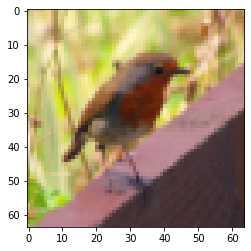

In [12]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [14]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

In [15]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


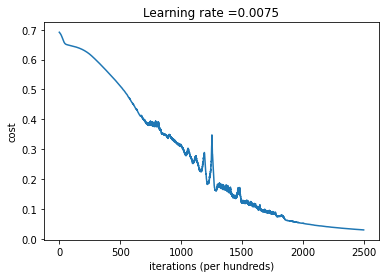

0.029526780113273674


In [23]:
n_x = 12288 # 64*64*3
n_h = 10
n_y = 1
learning_rate = 0.0075
iterations = 2500
X = train_x
Y = train_y
params = initialize_parameters(n_x,n_h,n_y)
W1 = params["W1"]
W2 = params["W2"]
b1 = params["b1"]
b2 = params["b2"]

costs=[]
gradients = {}

for i in range(0,iterations):
    A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
    A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
    cost = compute_cost(A2,Y)
    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
    dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
    gradients['dW1'] = dW1
    gradients['db1'] = db1
    gradients['dW2'] = dW2
    gradients['db2'] = db2
    params = update_parameters(params,gradients,learning_rate)
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    costs.append(cost)
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
print(costs[len(costs)-1])


In [24]:
predictions_train = predict(train_x, train_y, params)

Accuracy: 0.9999999999999998


In [25]:
predictions_test = predict(test_x, test_y, params)

Accuracy: 0.68
